# IMPORTTING LIBRARIES

In [1]:
import tensorflow as tf
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import random

# IMPORTING DATA

In [2]:
(train_images,train_labels),(test_images,test_labels) = tf.keras.datasets.cifar100.load_data()

# ANALYZING AND VISUALIZING THE DATA

In [3]:
train_images.shape

(50000, 32, 32, 3)

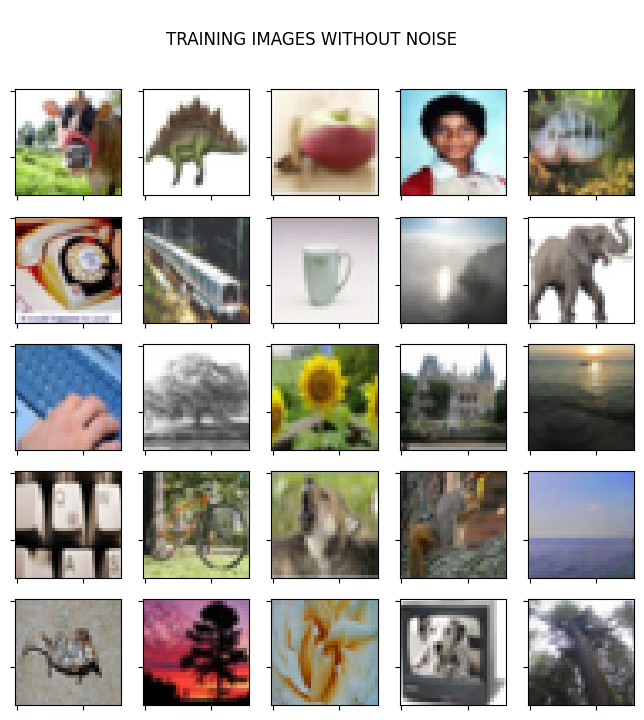

In [3]:
fig,axes = plt.subplots(nrows = 5,ncols = 5,figsize = (8,8))
row=0
col = 0
for i in range(25):
    if i%5==0 and i!=0:
       row+=1
       col = 0
       axes[row][col].imshow(train_images[i])
       axes[row][col].set_xticklabels([])
       axes[row][col].set_yticklabels([])
       col+=1
       continue
    axes[row][col].imshow(train_images[i])
    axes[row][col].set_xticklabels([])
    axes[row][col].set_yticklabels([])
    col+=1
fig.suptitle("\nTRAINING IMAGES WITHOUT NOISE ")
plt.show()

# ADDING NOISE TO MAKE THE DATASET

In [4]:
noise = 0.3
train_noise_images = (train_images/255) + noise*np.random.normal(0,0.3,size = train_images.shape)
train_noise_images = np.clip(train_noise_images,0,1)
train_images = train_images/255

## VISUALIZING THE NOISY DATASET

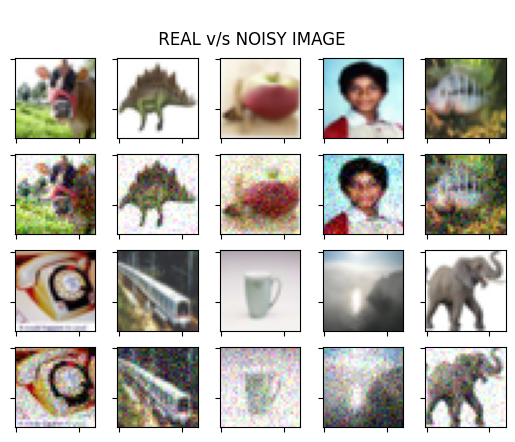

In [6]:
fig,axes = plt.subplots(nrows=4,ncols=5)
row = 0
col = 0
for i in range(10):
    if i == 5 :
        row+=2
        col=0
        axes[row][col].imshow(train_images[i])
        axes[row][col].set_xticklabels([])
        axes[row][col].set_yticklabels([])
        col+=1
        continue
    else:
        axes[row][col].imshow(train_images[i])
        axes[row][col].set_xticklabels([])
        axes[row][col].set_yticklabels([])
        col+=1
col = 0
row = 1
for i in range(10):
    if i == 5 :
        row+=2
        col=0
        axes[row][col].imshow(train_noise_images[i])
        axes[row][col].set_xticklabels([])
        axes[row][col].set_yticklabels([])
        col+=1
        continue
    else:
        axes[row][col].imshow(train_noise_images[i])
        axes[row][col].set_xticklabels([])
        axes[row][col].set_yticklabels([])
        col+=1
fig.suptitle("\n REAL v/s NOISY IMAGE \n")
fig.savefig("Data visualzied.png")
fig.show()

## MAKING THE TEST DATASET

In [7]:
test_noisy_images = (test_images/255) + noise*np.random.normal(0,0.3,size=test_images.shape)
test_noisy_images = np.clip(test_noisy_images,0,1)
test_images = test_images/255

# MODEL FORMULATION

In [42]:
class autoencoder:
    def __init__(self,shape):
        self.encoder = self.get_encoder(shape)
        self.decoder = self.get_decoder()
        self.model = tf.keras.Sequential(name="auto_encoder")
        self.model.add(self.encoder)
        self.model.add(self.decoder)
    def get_encoder(self,shape,name = "encoder"):
        encoder = tf.keras.Sequential(name=name)
        encoder.add(tf.keras.layers.Input(shape=(shape),name="Input"))
        encoder.add(tf.keras.layers.Conv2D(128,kernel_size=3,activation="relu",padding="same"))
        encoder.add(tf.keras.layers.BatchNormalization())
        encoder.add(tf.keras.layers.MaxPooling2D((2,2)))
        encoder.add(tf.keras.layers.Dropout(0.3))
        encoder.add(tf.keras.layers.Conv2D(64,3,activation="relu",padding="same"))
        encoder.add(tf.keras.layers.LeakyReLU())
        encoder.add(tf.keras.layers.BatchNormalization())
        encoder.add(tf.keras.layers.MaxPooling2D())
        encoder.add(tf.keras.layers.Conv2D(64,3,activation="relu",padding="same"))
        encoder.add(tf.keras.layers.MaxPooling2D())
        return encoder
    def get_decoder(self,name="decoder"):
        decoder = tf.keras.Sequential(name=name)
        decoder.add(tf.keras.layers.Conv2DTranspose(64,kernel_size=3,strides=2,padding="same"))
        decoder.add(tf.keras.layers.BatchNormalization())
        decoder.add(tf.keras.layers.Dropout(0.3))
        decoder.add(tf.keras.layers.Conv2DTranspose(64,kernel_size=3,strides=2,padding="same"))
        decoder.add(tf.keras.layers.BatchNormalization())
        decoder.add(tf.keras.layers.Conv2DTranspose(3,kernel_size=3,strides=2,padding="same"))
        return decoder


In [43]:
auto_encoder = autoencoder((32,32,3))
auto_encoder.model.compile(optimizer="Adam",loss="binary_crossentropy")

In [44]:
auto_encoder.model(np.array([train_noise_images[1]])).shape

TensorShape([1, 32, 32, 3])

In [8]:
auto_encoder.model.summary()

Model: "auto_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Sequential)        (None, 4, 4, 64)          28896     
                                                                 
 decoder (Sequential)        (1, 32, 32, 3)            56643     
                                                                 
Total params: 85539 (334.14 KB)
Trainable params: 85219 (332.89 KB)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [18]:
from keras.layers import Conv2DTranspose, BatchNormalization, add, LeakyReLU
from keras.optimizers import Adam
from keras.layers import Conv2D, Input, Dense, Dropout, MaxPool2D, UpSampling2D
from keras.models import Model

In [19]:
inputs = Input(shape=(32,32,3))
x = Conv2D(32, 3, activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = MaxPool2D()(x)
x = Dropout(0.5)(x)
skip = Conv2D(32, 3, padding='same')(x) # skip connection for decoder
x = LeakyReLU()(skip)
x = BatchNormalization()(x)
x = MaxPool2D()(x)
x = Dropout(0.5)(x)
x = Conv2D(64, 3, activation='relu', padding='same')(x)
x = BatchNormalization()(x)
encoded = MaxPool2D()(x)
# Decoder
x = Conv2DTranspose(64, 3,activation='relu',strides=(2,2), padding='same')(encoded)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Conv2DTranspose(32, 3, activation='relu',strides=(2,2), padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Conv2DTranspose(32, 3, padding='same')(x)
x = add([x,skip]) # adding skip connection
x = LeakyReLU()(x)
x = BatchNormalization()(x)
decoded = Conv2DTranspose(3, 3, activation='sigmoid',strides=(2,2), padding='same')(x)
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 32, 32, 32)           896       ['input_1[0][0]']             
                                                                                                  
 batch_normalization_4 (Bat  (None, 32, 32, 32)           128       ['conv2d_3[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)           0         ['batch_normalization_4[0]

In [45]:
auto_encoder.model.fit(train_noise_images,train_images,epochs=25)

Epoch 1/25
1563/1563 [==============================] - 19s 9ms/step - loss: 1.1426
Epoch 2/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7011
Epoch 3/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6698
Epoch 4/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6463
Epoch 5/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6351
Epoch 6/25
1563/1563 [==============================] - 15s 9ms/step - loss: 0.6275
Epoch 7/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6241
Epoch 8/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6065
Epoch 9/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5967
Epoch 10/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5946
Epoch 11/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5955
Epoch 12/25
1563/1563 [==============================] - 14s 9ms/step - lo

In [46]:
prediction = auto_encoder.model.predict(np.array([train_noise_images[19]]))

1/1 [==============================] - 0s 148ms/step


In [47]:
prediction.shape

(1, 32, 32, 3)

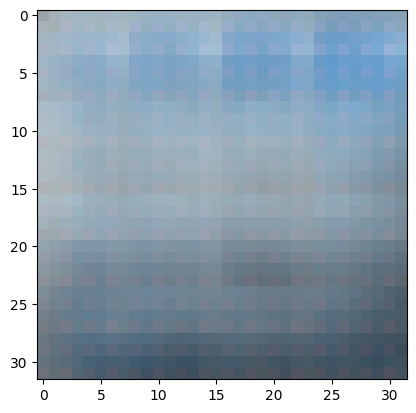

In [48]:
plt.imshow(prediction[0])

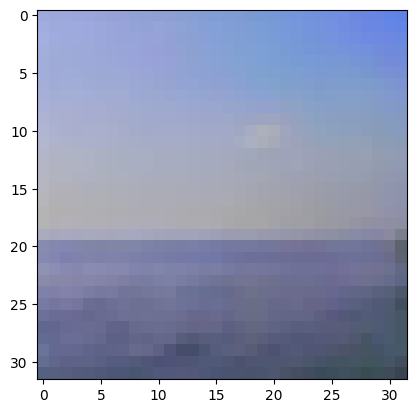

In [35]:
plt.imshow(train_images[19])